In [7]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('/Users/abhinava/Downloads/agedetectiontrain/train.csv')
test = pd.read_csv('/Users/abhinava/Downloads/agedetectiontest/test.csv')

In [9]:
train.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


/var/folders/g6/pvgz4mw90lv0ycb1l7wgyg280000gn/T/ipykernel_13915/693763890.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/Users/abhinava/Downloads/agedetectiontrain/Train', img_name))


Age group: MIDDLE


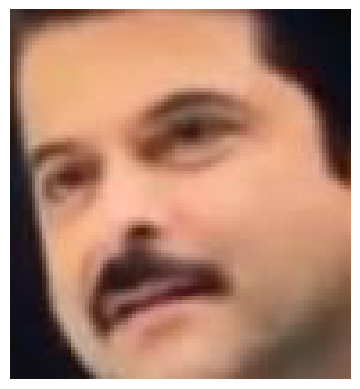

In [8]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('/Users/abhinava/Downloads/agedetectiontrain/Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('/Users/abhinava/Downloads/agedetectiontrain/Train',img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

/var/folders/g6/pvgz4mw90lv0ycb1l7wgyg280000gn/T/ipykernel_13915/3777525876.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [12]:
temp = []
for img_name in test.ID:
    img_path = os.path.join('/Users/abhinava/Downloads/agedetectiontest/Test',img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

/var/folders/g6/pvgz4mw90lv0ycb1l7wgyg280000gn/T/ipykernel_13915/243992028.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [13]:
train_x = train_x/255.0
test_x = test_x/255.0

In [14]:
# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.to_categorical(train_y)

In [17]:
model = Sequential([
    InputLayer(shape = (32,32,3)),
    Flatten(),
    Dense(500,activation='relu'),
    Dense(3,activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(train_x,train_y,batch_size = 128,epochs = 5,verbose = 1)

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5438 - loss: 0.9271
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6076 - loss: 0.8447
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6079 - loss: 0.8329
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6293 - loss: 0.8073
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6214 - loss: 0.8141


In [21]:
model.fit(train_x,train_y,batch_size = 128,epochs = 5,verbose = 1,validation_split = 0.2)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6313 - loss: 0.8047 - val_accuracy: 0.6323 - val_loss: 0.7868
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6365 - loss: 0.7860 - val_accuracy: 0.6406 - val_loss: 0.7973
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6427 - loss: 0.7864 - val_accuracy: 0.6374 - val_loss: 0.7973
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6490 - loss: 0.7818 - val_accuracy: 0.6168 - val_loss: 0.8144
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6437 - loss: 0.7824 - val_accuracy: 0.6575 - val_loss: 0.7658


In [22]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 100
batch_size = 128

In [25]:
import re
def models_with_different_optimizers(list_of_optimizers):    
    
    for i in range(len(list_of_optimizers)):        
        model.compile(loss='categorical_crossentropy',
                  optimizer=list_of_optimizers[i], # Learning rate and momentum can be passed inside optimizer
                  metrics=['accuracy'])
        # Traning the model and writing log files for TensorBoard in distinct directories        
        val = re.search('optimizers\..*\so', str(list_of_optimizers[i])).group(0)[11:][:-2] # Fetching optimizer name
        logdir = r'optims\\' + val # Each log file needs to be written in a distinct directory. (Mandatory)
        
        # Writing graph will take time. Hence, keeping it False.
        cb = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=False)         
        print('Building model using '+ val + ' optimizer')
        history = model.fit(train_x, train_y, epochs=epochs, 
                           validation_split=0.2,
                           callbacks=[cb])
        print('Model built sucessfully.')
        print('')
# Listing the optimizers
optims = [keras.optimizers.Adam(), keras.optimizers.Adadelta(), 
          keras.optimizers.Adagrad(), keras.optimizers.RMSprop(), 
          keras.optimizers.SGD()]
# Calling the function
models_with_different_optimizers(optims)


Building model using adam.Adam optimizer
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5681 - loss: 1.0527 - val_accuracy: 0.5844 - val_loss: 0.8625
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6155 - loss: 0.8404 - val_accuracy: 0.6419 - val_loss: 0.7858
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6279 - loss: 0.8094 - val_accuracy: 0.6524 - val_loss: 0.7720
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6374 - loss: 0.7913 - val_accuracy: 0.6567 - val_loss: 0.7754
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6426 - loss: 0.7804 - val_accuracy: 0.6610 - val_loss: 0.7640
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6479 - loss: 0.7791 - val_accuracy: 0.6602 - val_loss: 0.7668
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6583 - loss: 0.7657 - val_accuracy: 0.5834 - val_loss: 0.8954
Epoch 8/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - a

Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7485 - loss: 0.5835 - val_accuracy: 0.6911 - val_loss: 0.7320
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7584 - loss: 0.5559 - val_accuracy: 0.6763 - val_loss: 0.7545
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7423 - loss: 0.5845 - val_accuracy: 0.6934 - val_loss: 0.7396
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7493 - loss: 0.5797 - val_accuracy: 0.6961 - val_loss: 0.7733
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7551 - loss: 0.5645 - val_accuracy: 0.6818 - val_loss: 0.8048
Epoch 56/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7625 - loss: 0.5611 - val_accuracy: 0.6886 - val_loss: 0.7491
Epoch 57/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7550 - loss: 0.5715 - val_accuracy: 0.6909 - val_loss: 0.7465
Epoch 58/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7681 - loss: 0.5504 - 

Model built sucessfully.

Building model using adadelta.Adadelta optimizer
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7969 - loss: 0.4782 - val_accuracy: 0.6866 - val_loss: 0.8256
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8054 - loss: 0.4637 - val_accuracy: 0.6886 - val_loss: 0.8176
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8114 - loss: 0.4535 - val_accuracy: 0.6904 - val_loss: 0.8134
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8127 - loss: 0.4539 - val_accuracy: 0.6914 - val_loss: 0.8104
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8191 - loss: 0.4355 - val_accuracy: 0.6924 - val_loss: 0.8081
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8127 - loss: 0.4465 - val_accuracy: 0.6929 - val_loss: 0.8064
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8112 - loss: 0.4520 - val_accuracy: 0.6914 - val_loss: 0.8050
Epoch 8/100
498/498 ━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8233 - loss: 0.4270 - val_accuracy: 0.6964 - val_loss: 0.7983
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8210 - loss: 0.4292 - val_accuracy: 0.6961 - val_loss: 0.7983
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8271 - loss: 0.4188 - val_accuracy: 0.6966 - val_loss: 0.7984
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8255 - loss: 0.4278 - val_accuracy: 0.6966 - val_loss: 0.7984
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8209 - loss: 0.4341 - val_accuracy: 0.6969 - val_loss: 0.7984
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8227 - loss: 0.4269 - val_accuracy: 0.6964 - val_loss: 0.7985
Epoch 56/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8245 - loss: 0.4290 - val_accuracy: 0.6966 - val_loss: 0.7985
Epoch 57/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8215 - loss: 0.4204 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8214 - loss: 0.4344 - val_accuracy: 0.6976 - val_loss: 0.7996
Model built sucessfully.

Building model using adagrad.Adagrad optimizer
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8216 - loss: 0.4246 - val_accuracy: 0.6981 - val_loss: 0.8019
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8204 - loss: 0.4266 - val_accuracy: 0.6966 - val_loss: 0.8018
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8244 - loss: 0.4305 - val_accuracy: 0.6951 - val_loss: 0.8031
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8202 - loss: 0.4316 - val_accuracy: 0.6959 - val_loss: 0.8035
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8248 - loss: 0.4207 - val_accuracy: 0.6964 - val_loss: 0.8038
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8242 - loss: 0.4289 - val_accuracy: 0.6971 - val_loss: 0.8039
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8270 - loss: 0.4147 - val_accuracy: 0.6981 - val_loss: 0.8116
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8263 - loss: 0.4152 - val_accuracy: 0.6966 - val_loss: 0.8122
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8260 - loss: 0.4175 - val_accuracy: 0.6961 - val_loss: 0.8118
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8200 - loss: 0.4244 - val_accuracy: 0.6964 - val_loss: 0.8123
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8253 - loss: 0.4224 - val_accuracy: 0.6971 - val_loss: 0.8121
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8199 - loss: 0.4260 - val_accuracy: 0.6966 - val_loss: 0.8127
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8245 - loss: 0.4193 - val_accuracy: 0.6954 - val_loss: 0.8125
Epoch 56/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8249 - loss: 0.4229 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8311 - loss: 0.4096 - val_accuracy: 0.6946 - val_loss: 0.8171
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8256 - loss: 0.4151 - val_accuracy: 0.6956 - val_loss: 0.8171
Model built sucessfully.

Building model using rmsprop.RMSprop optimizer
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7930 - loss: 0.5018 - val_accuracy: 0.6773 - val_loss: 0.8385
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7936 - loss: 0.5033 - val_accuracy: 0.6557 - val_loss: 0.9739
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7857 - loss: 0.5006 - val_accuracy: 0.6730 - val_loss: 0.8698
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7993 - loss: 0.4805 - val_accuracy: 0.6647 - val_loss: 0.9662
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7844 - loss: 0.4939 - val_accuracy: 0.6770 - val_loss: 0.8745
Epoch 6/100
498/498 ━━━━━━━━━━━━━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8107 - loss: 0.4565 - val_accuracy: 0.6293 - val_loss: 1.0704
Epoch 49/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8102 - loss: 0.4494 - val_accuracy: 0.6610 - val_loss: 1.0395
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8118 - loss: 0.4444 - val_accuracy: 0.6429 - val_loss: 1.0716
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8109 - loss: 0.4578 - val_accuracy: 0.6492 - val_loss: 1.0188
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8089 - loss: 0.4529 - val_accuracy: 0.6876 - val_loss: 1.0502
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8140 - loss: 0.4485 - val_accuracy: 0.6745 - val_loss: 1.0185
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8121 - loss: 0.4522 - val_accuracy: 0.6710 - val_loss: 1.0599
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8150 - loss: 0.4463 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8247 - loss: 0.4109 - val_accuracy: 0.6519 - val_loss: 1.1685
Epoch 99/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8204 - loss: 0.4310 - val_accuracy: 0.6364 - val_loss: 1.3280
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8241 - loss: 0.4270 - val_accuracy: 0.6763 - val_loss: 1.1842
Model built sucessfully.

Building model using sgd.SGD optimizer
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8608 - loss: 0.3501 - val_accuracy: 0.6833 - val_loss: 1.1227
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8647 - loss: 0.3291 - val_accuracy: 0.6743 - val_loss: 1.1489
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3320 - val_accuracy: 0.6728 - val_loss: 1.1593
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.3306 - val_accuracy: 0.6683 - val_loss: 1.1653
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 

498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8717 - loss: 0.3188 - val_accuracy: 0.6763 - val_loss: 1.2387
Epoch 48/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8756 - loss: 0.3150 - val_accuracy: 0.6758 - val_loss: 1.2420
Epoch 49/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8739 - loss: 0.3196 - val_accuracy: 0.6743 - val_loss: 1.2433
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3211 - val_accuracy: 0.6753 - val_loss: 1.2371
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.3222 - val_accuracy: 0.6763 - val_loss: 1.2453
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8725 - loss: 0.3109 - val_accuracy: 0.6733 - val_loss: 1.2409
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3156 - val_accuracy: 0.6693 - val_loss: 1.2455
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8762 - loss: 0.3162 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.3085 - val_accuracy: 0.6796 - val_loss: 1.2952
Epoch 98/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8757 - loss: 0.3119 - val_accuracy: 0.6853 - val_loss: 1.3289
Epoch 99/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8805 - loss: 0.3069 - val_accuracy: 0.6808 - val_loss: 1.3007
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8822 - loss: 0.3081 - val_accuracy: 0.6750 - val_loss: 1.3010
Model built sucessfully.



In [28]:
def models_with_different_activation_fn(list_of_activation_fn):    
    
    for i in range(len(list_of_activation_fn)):        
        # Defining the network
        model = Sequential([
          InputLayer(input_shape=input_num_units),
          Flatten(),
          Dense(units=hidden_num_units, activation=list_of_activation_fn[i]),
          Dense(units=output_num_units, activation='softmax'),
        ])
        model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
        # Traning the model and writing log files for TensorBoard in distinct directories                
        logdir = r'activation\\' + list_of_activation_fn[i] # Each log file needs to be written in a distinct directory. (Mandatory)
        
        # Writing graph will take time. Hence, keeping it False.
        cb = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=False)         
        print('Building model using '+ list_of_activation_fn[i] + ' activation function')
        
        history = model.fit(train_x, train_y, epochs=epochs, 
                           validation_split=0.2,
                           callbacks=[cb])
        print('Model built sucessfully.')
        print('')
# List of activation functions
act = ['linear', 'sigmoid', 'tanh', 'relu', 'softmax']
# Calling the function
models_with_different_activation_fn(act)


Building model using linear activation function
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5167 - loss: 2.0572 - val_accuracy: 0.6359 - val_loss: 0.8094
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5880 - loss: 0.8955 - val_accuracy: 0.6268 - val_loss: 0.8057
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6107 - loss: 0.8369 - val_accuracy: 0.6369 - val_loss: 0.7983
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6245 - loss: 0.8186 - val_accuracy: 0.6175 - val_loss: 0.8324
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6229 - loss: 0.8189 - val_accuracy: 0.6399 - val_loss: 0.7867
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6180 - loss: 0.8166 - val_accuracy: 0.6281 - val_loss: 0.8146
Epoch 7/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6288 - loss: 0.8073 - val_accuracy: 0.6102 - val_loss: 0.8136
Epoch 8/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/s

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6683 - loss: 0.7629 - val_accuracy: 0.6411 - val_loss: 0.7707
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6532 - loss: 0.7726 - val_accuracy: 0.6128 - val_loss: 0.9267
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6529 - loss: 0.7853 - val_accuracy: 0.6449 - val_loss: 0.8152
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6575 - loss: 0.7691 - val_accuracy: 0.6301 - val_loss: 0.8154
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6591 - loss: 0.7600 - val_accuracy: 0.6519 - val_loss: 0.7785
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6619 - loss: 0.7496 - val_accuracy: 0.6150 - val_loss: 0.8548
Epoch 56/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6513 - loss: 0.7799 - val_accuracy: 0.6560 - val_loss: 0.7723
Epoch 57/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6682 - loss: 0.7572 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6598 - loss: 0.7632 - val_accuracy: 0.6514 - val_loss: 0.7944
Model built sucessfully.

Building model using sigmoid activation function
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5585 - loss: 1.0308 - val_accuracy: 0.5912 - val_loss: 0.8744
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6080 - loss: 0.8375 - val_accuracy: 0.6404 - val_loss: 0.7963
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6290 - loss: 0.8083 - val_accuracy: 0.6414 - val_loss: 0.8039
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6409 - loss: 0.7884 - val_accuracy: 0.5962 - val_loss: 0.8264
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6606 - loss: 0.7688 - val_accuracy: 0.6401 - val_loss: 0.7743
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6578 - loss: 0.7711 - val_accuracy: 0.6698 - val_loss: 0.7522
Epoch 7/100
498/498 ━━━━━━━━━━━━━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7737 - loss: 0.5382 - val_accuracy: 0.6961 - val_loss: 0.7192
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7791 - loss: 0.5294 - val_accuracy: 0.6833 - val_loss: 0.7259
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7802 - loss: 0.5278 - val_accuracy: 0.6861 - val_loss: 0.7360
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7842 - loss: 0.5164 - val_accuracy: 0.6971 - val_loss: 0.7279
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7844 - loss: 0.5203 - val_accuracy: 0.6931 - val_loss: 0.7190
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7792 - loss: 0.5207 - val_accuracy: 0.7132 - val_loss: 0.7090
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7958 - loss: 0.4964 - val_accuracy: 0.6718 - val_loss: 0.7997
Epoch 56/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7920 - loss: 0.5070 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8525 - loss: 0.3711 - val_accuracy: 0.6961 - val_loss: 0.8296
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8544 - loss: 0.3685 - val_accuracy: 0.7037 - val_loss: 0.8130
Model built sucessfully.

Building model using tanh activation function
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5395 - loss: 1.6251 - val_accuracy: 0.6158 - val_loss: 0.8343
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5905 - loss: 0.8731 - val_accuracy: 0.6226 - val_loss: 0.8283
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6105 - loss: 0.8436 - val_accuracy: 0.6042 - val_loss: 0.8515
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6243 - loss: 0.8306 - val_accuracy: 0.6210 - val_loss: 0.8493
Epoch 5/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6190 - loss: 0.8356 - val_accuracy: 0.5653 - val_loss: 0.8623
Epoch 6/100
498/498 ━━━━━━━━━━━━━━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6943 - loss: 0.7031 - val_accuracy: 0.5211 - val_loss: 1.0334
Epoch 49/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6837 - loss: 0.7155 - val_accuracy: 0.6549 - val_loss: 0.7601
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6925 - loss: 0.7027 - val_accuracy: 0.6753 - val_loss: 0.7422
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6918 - loss: 0.7003 - val_accuracy: 0.6768 - val_loss: 0.7385
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6980 - loss: 0.6911 - val_accuracy: 0.6645 - val_loss: 0.7553
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6888 - loss: 0.6951 - val_accuracy: 0.6768 - val_loss: 0.7578
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6876 - loss: 0.7026 - val_accuracy: 0.6821 - val_loss: 0.7418
Epoch 55/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6940 - loss: 0.6992 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7164 - loss: 0.6471 - val_accuracy: 0.6296 - val_loss: 0.7990
Epoch 99/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7201 - loss: 0.6401 - val_accuracy: 0.6808 - val_loss: 0.7298
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7232 - loss: 0.6380 - val_accuracy: 0.6841 - val_loss: 0.7380
Model built sucessfully.

Building model using relu activation function
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5453 - loss: 1.0863 - val_accuracy: 0.6150 - val_loss: 0.8192
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6064 - loss: 0.8395 - val_accuracy: 0.6208 - val_loss: 0.8182
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6077 - loss: 0.8244 - val_accuracy: 0.6394 - val_loss: 0.7871
Epoch 4/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6305 - loss: 0.7986 - val_accuracy: 0.6261 - val_loss: 0.8240
Epoch 5/100
498/498 ━━━━━━━━━━━━━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7621 - loss: 0.5559 - val_accuracy: 0.7042 - val_loss: 0.7199
Epoch 48/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7534 - loss: 0.5657 - val_accuracy: 0.7047 - val_loss: 0.7326
Epoch 49/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7710 - loss: 0.5393 - val_accuracy: 0.6738 - val_loss: 0.8003
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7641 - loss: 0.5612 - val_accuracy: 0.6858 - val_loss: 0.7309
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7702 - loss: 0.5441 - val_accuracy: 0.6946 - val_loss: 0.7307
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7690 - loss: 0.5528 - val_accuracy: 0.6951 - val_loss: 0.7163
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7723 - loss: 0.5390 - val_accuracy: 0.6951 - val_loss: 0.7494
Epoch 54/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7701 - loss: 0.5395 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8008 - loss: 0.4657 - val_accuracy: 0.6868 - val_loss: 0.9026
Epoch 98/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8166 - loss: 0.4356 - val_accuracy: 0.6951 - val_loss: 0.8460
Epoch 99/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8111 - loss: 0.4548 - val_accuracy: 0.7044 - val_loss: 0.8512
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8212 - loss: 0.4276 - val_accuracy: 0.6891 - val_loss: 0.8372
Model built sucessfully.

Building model using softmax activation function
Epoch 1/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5433 - loss: 1.0109 - val_accuracy: 0.5439 - val_loss: 0.9507
Epoch 2/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5382 - loss: 0.9500 - val_accuracy: 0.5439 - val_loss: 0.9004
Epoch 3/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5441 - loss: 0.9015 - val_accuracy: 0.5708 - val_loss: 0.8840
Epoch 4/100
498/498 ━━━━━━━━━━

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6790 - loss: 0.7402 - val_accuracy: 0.6718 - val_loss: 0.7627
Epoch 47/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6840 - loss: 0.7341 - val_accuracy: 0.6657 - val_loss: 0.7621
Epoch 48/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6917 - loss: 0.7340 - val_accuracy: 0.6534 - val_loss: 0.7726
Epoch 49/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.7259 - val_accuracy: 0.6565 - val_loss: 0.7780
Epoch 50/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6852 - loss: 0.7329 - val_accuracy: 0.6560 - val_loss: 0.8052
Epoch 51/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6839 - loss: 0.7373 - val_accuracy: 0.6652 - val_loss: 0.7844
Epoch 52/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6814 - loss: 0.7433 - val_accuracy: 0.6703 - val_loss: 0.7630
Epoch 53/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6821 - loss: 0.7364 - val_accuracy:

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7088 - loss: 0.6932 - val_accuracy: 0.6781 - val_loss: 0.7789
Epoch 97/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7061 - loss: 0.6888 - val_accuracy: 0.6700 - val_loss: 0.7897
Epoch 98/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7052 - loss: 0.6930 - val_accuracy: 0.6484 - val_loss: 0.8198
Epoch 99/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7101 - loss: 0.6855 - val_accuracy: 0.6544 - val_loss: 0.7850
Epoch 100/100
498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7069 - loss: 0.6962 - val_accuracy: 0.6597 - val_loss: 0.8013
Model built sucessfully.



In [34]:
# For finding optimum learning rate [pip install keras_lr_finder]
import keras_lr_finder as lr_find 
lr_finder = lr_find.LRFinder(model)
# Training can stop abruptly if rate is set too high. In such cases, reduce the value of end_lr. 
lr_finder.find(train_x, train_y, start_lr=0.0001, end_lr=0.09, batch_size=batch_size, epochs=epochs)
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)


ValueError: The filename must end in `.weights.h5`. Received: filepath=tmp.h5